INTRODUCCIÓN
    
Beta Bank está perdiendo clientes gradualmente cada mes, y los banqueros han descubierto que es más económico retener a los clientes actuales que atraer nuevos. El objetivo es predecir si un cliente dejará el banco próximamente, utilizando datos sobre el comportamiento pasado y la terminación de contratos. Se requiere crear un modelo con un valor F1 de al menos 0.59 en el conjunto de prueba. Además, se debe calcular la métrica AUC-ROC y compararla con el valor F1.

Tabla de Contenido

1. Librerias y Modulos.
2. Descarga de Datos.
3. Preparación de los Datos.
4. Cambiar tipo de Columnas
5. Proporción de los Datos.
6. Segmentación de los Datos.
7. Escalado de Datos.
8. Examinando el Desequilibrio de Clases.
9. Arreglando el Desequilibrio de Clases.
10. Sobreajuste.
11. Subajuste.
12. Conclusiones.

1. Librerias y Modulos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler


2. Descarga de Datos.

In [2]:
data= pd.read_csv('Churn.csv')
display(data.head(10))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


3. Preparación de los Datos.

Reemplazar valores Ausentes (NaN) por Cero (0).

In [4]:
data.loc[data['Tenure'].isna(), 'Tenure'] = 0

La columna "Tenure" presenta 909 valores faltantes (NaN). Para mantener el tamaño del conjunto de datos, se decidió reemplazar estos valores con ceros. 

Eliminación de columnas

In [5]:
new_data= data.drop(['RowNumber','CustomerId','Surname'], axis=1)
new_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Se procede a eliminar las columnas "RowNumber", "CustomerId" y "Surname" del conjunto de datos, dado que estas no son relevantes para el análisis en cuestión. Esta acción simplifica el modelo y optimiza el proceso de entrenamiento.

4. Cambiar tipo de columnas

In [6]:
new_data= pd.get_dummies(new_data, drop_first= True, columns=['Geography', 'Gender'])
new_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1.0,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8.0,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1.0,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2.0,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7.0,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,True,False,True


Las columnas Geography y Gender, actualmente de tipo object, se convierten a tipo booleano. Esta transformación implica una simplificación de los datos.

In [7]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(3), int64(6)
memory usage: 732.6 KB


5. Proporcion de los datos.

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


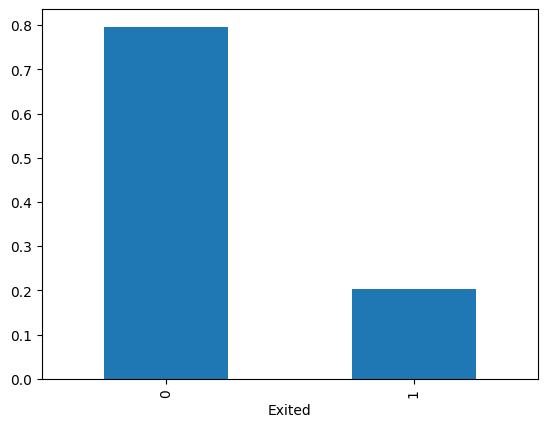

In [8]:
proporcion_datos = new_data['Exited'].value_counts(normalize=True)
print( proporcion_datos)

proporcion_datos.plot(kind='bar')

plt.show()

 El análisis del gráfico revela un desbalance en los datos: 7963 clientes se mantienen activos en el banco, mientras que 2037 han cancelado sus servicios.

6. Segmentacion de los Datos

In [9]:
train_valid, test = train_test_split(new_data, test_size=0.20) #entrenamiento
train, valid = train_test_split(train_valid, test_size=0.25) # validacion y test

features_train= train.drop(['Exited'], axis=1)
target_train = train['Exited']

features_valid = valid.drop(['Exited'], axis=1)
target_valid= valid['Exited']

features_test= test.drop(['Exited'], axis=1)
target_test= test['Exited']

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


 Los datos se dividieron en los siguientes conjuntos: entrenamiento (80%), validación (10%) y prueba (10%).

7. Escalado de Datos

In [10]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(3), int64(6)
memory usage: 732.6 KB


In [11]:
escalador = StandardScaler()
variable_numerica= ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
features_train[variable_numerica]= escalador.fit_transform(features_train[variable_numerica])
features_valid[variable_numerica]= escalador.fit_transform(features_valid[variable_numerica])
features_test[variable_numerica]= escalador.fit_transform(features_test[variable_numerica])


Se realiza el escalado de datos para transformar los valores numéricos de las características a una escala común. Esto mejora la capacidad del modelo para aprender patrones relevantes.

8. Examinando el Desequilibrio de Clases

Para evaluar el impacto del desequilibrio de clases en el rendimiento de los modelos, se procede a entrenarlos y calcular la métrica F1-score.

In [12]:
# DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(features_train, target_train)
dummy_pred= dummy.predict(features_valid)

print('F1:', f1_score(target_valid, dummy_pred))

F1: 0.0


In [13]:
# DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('F1:',f1_score(target_valid, predicted_valid))

F1: 0.4444444444444444


In [15]:
# RandomForestClassifier

best_score = 0
best_est = 0
for est in range(1, 20): 
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_train, target_train)
    score = model.score(features_valid, target_valid) 
    
    if score > best_score:
        best_score = score
        best_est =  est
print("La exactitud del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score))

model = RandomForestClassifier(random_state=12345, n_estimators=18) 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('F1:',f1_score(target_valid, predicted_valid))

La exactitud del mejor modelo en el conjunto de validación (n_estimators = 18): 0.8555
F1: 0.5601217656012177


In [16]:
# regresion LogisticRegression

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train) 
predicted_valid= model.predict(features_valid) 

print('F1:', f1_score(target_valid, predicted_valid))


F1: 0.3397548161120841


Ninguno de los modelos entrenados alcanzó el umbral mínimo de F1-score de 0.59. Sin embargo, el modelo de Bosque Aleatorio (Random Forest Classifier) fue el que obtuvo los resultados más cercanos a este valor.


9. Arreglando el Desequilibrio de Clases

Para abordar el desequilibrio de clases, se entrenaron los modelos utilizando el parámetro class_weight='balanced', el cual asigna pesos a las clases de manera inversamente proporcional a su frecuencia, con el objetivo de equilibrar su influencia en el proceso de aprendizaje.

In [17]:
# regresion LogisticRegressio

model = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
model.fit(features_train, target_train) 
predicted_valid= model.predict(features_valid) 

print('F1:', f1_score(target_valid, predicted_valid))


F1: 0.4812554489973845


In [18]:
# DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=12345, class_weight='balanced' )
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('F1:',f1_score(target_valid, predicted_valid))

F1: 0.4971493728620296


In [20]:
# RandomForestClassifier

best_score = 0
best_est = 0
for est in range(1, 20): 
    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced') 
    model.fit(features_train, target_train)
    score = model.score(features_valid, target_valid) 
    
    if score > best_score:
        best_score = score
        best_est =  est
print("La exactitud del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score))

model = RandomForestClassifier(random_state=12345, n_estimators=8) 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('F1:',f1_score(target_valid, predicted_valid))

La exactitud del mejor modelo en el conjunto de validación (n_estimators = 8): 0.853
F1: 0.548238897396631


Emplear el parámetro class_weight='balanced' no fue suficiente para garantizar un rendimiento aceptable de los modelos. Ninguno de los modelos superó un F1-score de 0.59. Se procede a realizar el sobreajuste de los datos.

10. Sobreajuste

In [21]:
def sobreajuste(features, target, repeat):  

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_ajustado = pd.concat([features_zeros] + [features_ones] * repeat)
    target_ajustado = pd.concat([target_zeros] + [target_ones] * repeat)

    features_ajustado, target_ajustado = shuffle(features_ajustado, target_ajustado, random_state=12345)

    return features_ajustado, target_ajustado



In [22]:
features_sobreajustados, target_sobreajustado =sobreajuste(features_train, target_train, 3) 

In [23]:
# regresion LogisticRegressio

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_sobreajustados, target_sobreajustado) 
predicted_valid= model.predict(features_valid) 

print('F1:', f1_score(target_valid, predicted_valid))


F1: 0.4817813765182186


In [24]:
# DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=12345 )
model.fit(features_sobreajustados, target_sobreajustado)
predicted_valid = model.predict(features_valid)

print('F1:',f1_score(target_valid, predicted_valid))

F1: 0.4959630911188005


In [32]:
# RandomForestClassifier

best_score = 0
best_est = 0
for est in range(1, 20): 
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_sobreajustados, target_sobreajustado)
    score = model.score(features_valid, target_valid) 
    
    if score > best_score:
        best_score = score
        best_est =  est
print("La exactitud del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score))

model = RandomForestClassifier(random_state=12345, n_estimators=18) 
model.fit(features_sobreajustados, target_sobreajustado)
predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)[:, 1]
auc_roc = roc_auc_score(target_valid , predicted_valid)

print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', auc_roc)



La exactitud del mejor modelo en el conjunto de validación (n_estimators = 18): 0.854
F1: 0.5921787709497207
AUC-ROC: 0.7306939123031078


Para abordar el desbalance de clases, se aplicó una técnica de sobremuestreo, generando nuevas instancias de la clase minoritaria (clientes que abandonan el banco). Esto permite equilibrar la representación de ambas clases en el conjunto de entrenamiento y evitar que el modelo se sesgue hacia la clase mayoritaria.

Entre los modelos evaluados, el Bosque Aleatorio (Random Forest Classifier) fue el único que superó el umbral mínimo establecido, alcanzando un F1-score de 0.5921 y un AUC-ROC de 0.7306.

11. Subajuste.

In [34]:
def subajuste(features, target, fraccion):  

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_subajustado = pd.concat([features_zeros.sample(frac= fraccion, random_state= 12345)] + [features_ones])
    target_subajustado = pd.concat([target_zeros.sample(frac= fraccion, random_state= 12345)] + [target_ones] )
    
    features_subajustado, target_subajustado = shuffle(features_subajustado, target_subajustado, random_state=12345)

    return features_subajustado, target_subajustado

In [35]:
ajuste_features_subajustado, ajuste_target_subajustado= subajuste(features_train, target_train, 0.3)

In [36]:

# regresion LogisticRegressio

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(ajuste_features_subajustado, ajuste_target_subajustado) 
predicted_valid= model.predict(features_valid) 

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.49431818181818177


In [37]:
# DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=12345 )
model.fit(ajuste_features_subajustado, ajuste_target_subajustado)
predicted_valid = model.predict(features_valid)

print('F1:',f1_score(target_valid, predicted_valid))

F1: 0.45249597423510474


In [41]:
# RandomForestClassifier

best_score = 0
best_est = 0
for est in range(1, 20): 
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(ajuste_features_subajustado, ajuste_target_subajustado)
    score = model.score(features_valid, target_valid) 
    
    if score > best_score:
        best_score = score
        best_est =  est
print("La exactitud del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score))

model = RandomForestClassifier(random_state=12345, n_estimators=6) 
model.fit(ajuste_features_subajustado, ajuste_target_subajustado)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))


La exactitud del mejor modelo en el conjunto de validación (n_estimators = 6): 0.8
F1: 0.5698924731182795


El submuestreo no es la técnica más adecuada en este caso, ya que implica reducir el número de muestras de la clase mayoritaria para equilibrar las clases. Esta reducción puede conllevar la pérdida de información valiosa sobre los clientes que continúan con el banco, lo que podría disminuir el rendimiento general de lo modelos entrenados.

12. Conclusiones.

El valor del AUC-ROC, mide la capacidad del modelo para discriminar entre las clases, un valor de 0.5 representa una clasificación aleatoria, mientras que 1.0 indica una clasificación perfecta. Un AUC-ROC de 0.7306 indica un buen desempeño del modelo, aunque no perfecto. 

El F1-score, representa la media armónica de la precisión y el recall, un F1-score de 0.5921 sugiere un rendimiento moderado entre la capacidad de identificar correctamente los casos positivos (recall) y la proporción de positivos correctamente identificados (precisión).

El modelo presenta una buena capacidad para discriminar entre clases, evidenciado por un valor de AUC-ROC elevado. Sin embargo, el F1-score moderado sugiere que podría optimizarse el equilibrio entre precisión y recall. 


fi 0.6047
auc 0.735